# Representações de dados para redes neurais

### Scalars (rank-0 tensors)

Um tensor que contém apenas um número é chamado de escalar. No NumPy, um número float32 ou float64 é um tensor escalar (ou matriz escalar)

In [1]:
import numpy as np

In [2]:
x = np.array(12)
x

array(12)

In [3]:
x.ndim

0

### Vectors (rank-1 tensors)

Uma matriz de números é chamada de vetor, ou tensor de classificação 1, ou tensor 1D. Um tensor de classificação 1 tem exatamente um eixo

In [4]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [5]:
x.ndim

1

In [6]:
x.shape

(5,)

### Matrices (rank-2 tensors)

Uma matriz de vetores é uma matriz, ou tensor de classificação 2. Uma matriz tem dois eixos, ou seja, linhas e colunas

In [7]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [8]:
x.ndim

2

In [9]:
x.shape

(3, 5)

### Rank-3 and higher-rank tensors

Empacotar matrizes em uma nova matriz obterá um tensor de classificação 3 (ou tensor 3D)

In [10]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [11]:
x.ndim

3

In [12]:
x.shape

(3, 3, 5)

----

In [13]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
train_images.ndim

3

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_images.dtype

dtype('uint8')

Portanto, temos um tensor de classificação 3 de inteiros de 8 bits. Mais precisamente uma série de 60.000 matrizes de inteiros 28 × 28. Cada uma dessas matrizes é uma imagem em tons de cinza, com coeficientes entre 0 e 255

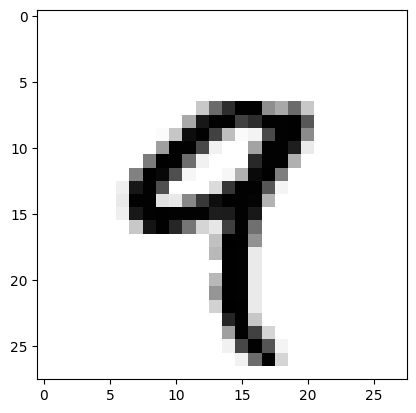

In [17]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [18]:
train_labels[4]

np.uint8(9)

### Manipulando Tensors

In [19]:
slicing = train_images[10:100]
slicing.shape

(90, 28, 28)

In [20]:
my_slice = train_images[:, 14:, 14:] # é útil para tarefas como recorte de regiões de interesse em imagens antes de processá-las em redes neurais
my_slice.shape

(60000, 14, 14)

### Batches

Os modelos de aprendizagem profunda não processam um conjunto de dados inteiro de uma só vez, eles dividem os dados em pequenos lotes

In [21]:
batch = train_images[:128]
batch2 = train_images[128:256]

### Tipos de Dados

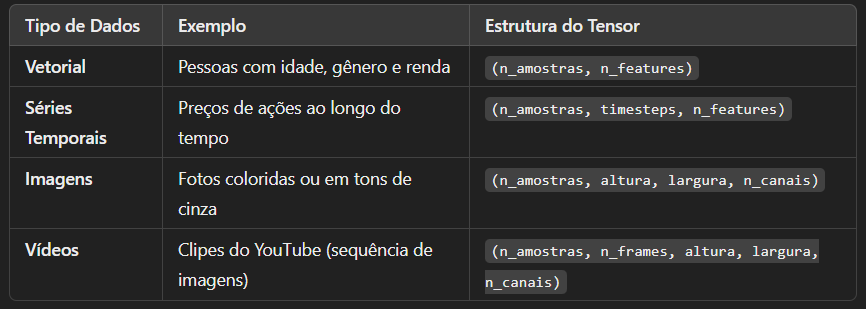

### Operações com Tensores

Exemplo inicial empilhando camadas densas. A camada é uma função matemática que recebe uma matriz como entrada e retorna outra matriz como saída. Em outras palavras, ela gera uma nova representação do tensor de entrada

O funcionamento dessa camada segue a seguinte equação matemática

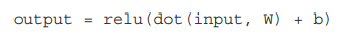

Onde:

input → é a matriz de entrada (os dados que passam pela camada).

W → é uma matriz de pesos aprendidos pela rede durante o treinamento.

b → é um vetor de bias (também aprendido pelo modelo).

ReLU → é a função de ativação aplicada ao resultado da operação anterior.

Isso significa que a camada transforma os dados de entrada em uma nova representação, ajustando os pesos e viés ao longo do treinamento para melhorar a capacidade do modelo de aprender padrões nos dados.

### ReLU

Função usada para ajudar o modelo a aprender padrões nos dados. 

- Se o número for positivo, mantém o número.
- Se o número for negativo, transforma em zero.
  
As implementações ReLU são lentas para matrizes grandes, por isso é melhor utilizar o próprio NumPy para operações vetorizadas

In [22]:
import numpy as np

In [23]:
x = np.random.random((20, 100))
y = np.random.random((20, 100))

z = x + y # operação vetorizada
z = np.maximum(z, 0.) # aplica ReLU

In [24]:
print(z)

[[1.0074097  0.83571387 1.1289722  ... 0.32504292 1.16218326 1.30384152]
 [1.05675175 0.76561412 1.70601319 ... 1.23848243 0.79078664 0.98714861]
 [1.3959036  0.63780238 1.39802573 ... 0.35795937 1.8149578  1.35047899]
 ...
 [0.84687889 1.34429075 0.75179704 ... 0.7286916  0.49842763 0.21672737]
 [0.95493607 1.64320884 1.67584327 ... 0.77236344 1.23605956 0.53804733]
 [0.93680243 1.2374935  1.46331357 ... 1.11808607 1.00916491 0.39126509]]


### Broadcasting

Se os tensores possuem formas diferentes, o NumPy automaticamente "expande" o tensor menor para que ele tenha o mesmo shape do maior, sem duplicar os dados na memória. Isso se chama broadcasting

In [29]:
X = np.random.random((32, 20))
y = np.random.random((20, ))

In [30]:
y = np.expand_dims(y, axis=0) # agora tem shape (1,10)

In [31]:
Y = np.concatenate([y] * 32, axis=0) # agora tem o mesmo shape de x

In [33]:
Z = X + y  
print(Z)

[[0.59319706 0.43567588 1.2624115  0.35632325 1.56954329 0.58178387
  0.58756224 1.3018817  0.82438326 0.88976741 1.22908157 0.77617984
  1.07404895 1.35393096 0.5631481  0.67067172 0.22010384 1.76798293
  0.94042682 0.83807484]
 [0.90738794 0.80079648 1.06805856 0.66028754 0.98506857 0.22548786
  0.52793734 1.50018627 0.4989511  1.07535409 0.84894289 1.58946154
  0.94317307 1.37129643 0.6030783  0.21178729 0.26058804 1.49518233
  0.72532686 0.75543082]
 [0.68821225 0.94750305 1.47467027 0.81438849 1.52298434 0.39879946
  1.18691229 1.26780021 0.91595326 1.147139   1.46111409 0.93787903
  0.5560564  1.31021514 0.37268809 0.13191098 0.53579072 1.55735549
  0.80922624 1.04753683]
 [1.21633203 0.87289954 0.94948758 1.05172576 0.93231924 0.01404199
  0.68776476 1.61153594 0.79088055 1.47436761 1.34976088 1.50765646
  1.20998671 0.8062394  0.34585798 0.93288968 0.18759176 1.40677998
  1.08262854 0.43656256]
 [1.20468616 0.42947561 1.00500274 1.03279834 1.15620639 0.44673098
  0.92058751 1.4

In [34]:
print(Z.shape)

(32, 20)


### Produto Escalar

O produto escalar (ou produto interno) entre dois vetores é a soma do produto de seus elementos correspondentes

In [35]:
x = np.random.random((32,))  
y = np.random.random((32,))  

z = np.dot(x, y)  
print(z)

7.819768344311868


In [36]:
X = np.random.random((64, 3))  
y = np.random.random((3,))    

z = np.dot(X, y)  
print(z.shape)  

(64,)


In [37]:
X = np.random.random((64, 3)) 
Y = np.random.random((3, 32))  

Z = np.dot(X, Y) 
print(Z.shape)  

(64, 32)


### Reshaping 

Reorganizar os elementos de um tensor para um novo formato, sem alterar o número total de elementos. Isso é útil em redes neurais onde muitas vezes precisamos converter imagens, séries temporais ou dados tabulares para formatos específicos

In [38]:
train_images = np.random.rand(6000, 28, 28)
train_images = train_images.reshape((6000, 28*28))
print(train_images.shape)

(6000, 784)


In [39]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
print(x.shape)

(3, 2)


In [40]:
x = x.reshape((6, 1))  # transformando em um vetor coluna
print(x)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]


In [41]:
x = x.reshape((2, 3))  
print(x)

[[0. 1. 2.]
 [3. 4. 5.]]


In [42]:
x = np.transpose(x)
x.shape

(3, 2)

In [43]:
x = np.array([[0., 1.], [2., 3.], [4., 5.]])
x = x.reshape((-1, 1)) # o NumPy ajusta automaticamente a primeira dimensão

In [44]:
print(x.shape)

(6, 1)
